In [3]:
## Do Not Change this Cell
import numpy as np
import sklearn
from sklearn.datasets import make_blobs, make_circles
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

General Instructions
For Task 1-4 Below you will reproduce what you did using the Neural Network Playground but this time in Keras/Tensor Flow. Above I have recreated the 4 similar data sets to those you had on the playground. If you execute the cells above they will be in the data frames:

df_blobs
df_squares
df_circle_w_blob
df_spiral_arm
Use these data sets, and the Keras/Tensorflow Sequential Model with Dense Layers to build a network which can classify these data sets.

Text(0, 0.5, '$x_1$')

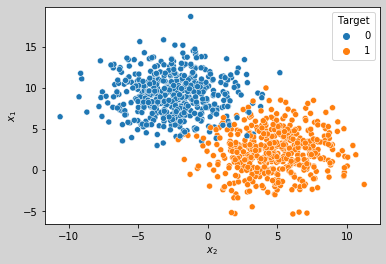

In [9]:
## Do Not Change this Cell
X_blobs, y_blobs = make_blobs(n_samples=1000, 
                  n_features=2, 
                  centers=2,
                  cluster_std=2.5,
                 random_state=42)
df_blobs = pd.DataFrame(data=X_blobs)
df_blobs['Target']=y_blobs
# Visualizing The Data Set
fig, ax = plt.subplots()
sns.scatterplot(data=df_blobs, x=0, y=1, hue='Target', ax=ax)
fig.patch.set_facecolor('lightgray')
ax.set_xlabel("$x_2$")
ax.set_ylabel("$x_1$")

Task 1
Start with a zero hidden layer neural network on the two blob data set on the bottom left of the data with just the linear features x1, x2.

Can you classify it?
Does converge with all the activations?

In [73]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K

In [172]:
tf.keras.backend.clear_session()
model = Sequential()
model.add(Dense(1 ,input_shape=(2,) ,activation='sigmoid'))
model.compile(optimizer='sgd' ,loss='binary_crossentropy' ,metrics=['accuracy'])
model.summary()

K.set_value(model.optimizer.learning_rate, .3)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, min_delta = 0.01, verbose = 1)

model.fit(X_blobs ,y_blobs ,epochs = 200 ,validation_split=.5 ,batch_size=10 ,callbacks = [early_stopping])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
50/50 [==============================] - 1s 19ms/step - loss: 0.1103 - accuracy: 0.9646 - val_loss: 0.0851 - val_accuracy: 0.9680
Epoch 2/200
50/50 [==============================] - 0s 6ms/step - loss: 0.0867 - accuracy: 0.9691 - val_loss: 0.0817 - val_accuracy: 0.9720
Epoch 3/200
50/50 [==============================] - 0s 8ms/step - loss: 0.1362 - accuracy: 0.9416 - val_loss: 0.0832 - val_accuracy: 0.9640
Epoch 4/200
50/50 [==============================] - 0s 6ms/step - loss: 0.0956 - accuracy: 0.9487 - val_loss: 0.0797 - val_accuracy: 0.9640
Epoch 5/200
50/50 [==============================] - 0s 6ms/step - loss: 0.0735 - accuracy:

Task 1 -- Discussion
In this cell discuss how your results for Task 1 compare to your results using the Neural Network Playground. Point by point compare your answers on the browser and with Keras/Tensorflow code.

In [ ]:
With the same learning rate, activation function, regularization (none), regularization rate (0,.0), 
validation split, and batch size they both appear to converge in less than 10 epochs.
I do not know what optimizer the browser is using.

Text(0, 0.5, '$x_1$')

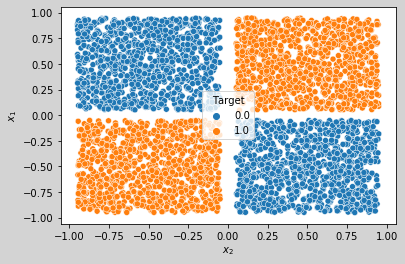

In [5]:
## Do Not Change this Cell
samples = 1000
def make_uniform_2D_random_square(num_samples,width=1.0,height=1.0,center=np.zeros((1,2))):
    uniform_square = np.random.random((samples,2))-np.array([0.5,0.5])
    uniform_square[:,1] = width*uniform_square[:,1]
    uniform_square[:,0] = height*uniform_square[:,0]
    return uniform_square + center
                                                           
                                                           
X_UL = make_uniform_2D_random_square(samples, width=0.9, height=0.9, center=[-0.5,0.5])
X_LR = make_uniform_2D_random_square(samples, width=0.9, height=0.9, center=[0.5,-0.5])
X_LL = make_uniform_2D_random_square(samples, width=0.9, height=0.9, center=[-0.5,-0.5])
X_UR = make_uniform_2D_random_square(samples, width=0.9, height=0.9, center=[0.5,0.5])
X_squares = np.vstack([X_UL, X_LR, X_LL, X_UR])
y_squares = np.hstack([np.zeros(2 * len(X_UL)),
                       np.ones(2 * len(X_UL))])

df_squares = pd.DataFrame(data=X_squares)
df_squares['Target']=y_squares
# Visualizing The Data Set
fig, ax = plt.subplots()
sns.scatterplot(data=df_squares, x=0, y=1, hue='Target', ax=ax)
fig.patch.set_facecolor('lightgray')
ax.set_xlabel("$x_2$")
ax.set_ylabel("$x_1$")
#fig, ax = plt.subplots()

Task 2 Now try the 4 square in the top-right row of the data choices.

Can you classify this with linear features and no hidden layers? What if you add features? Is there a way to classify it with more input features but still 0 hidden layers? Finally, see how it would work with linear features but hidden layers. Start smaller and get bigger, share and discuss the smallest network that can work.

In [ ]:
No, you cannot classify this with just linear features and no hidden layers. 
X1*X2 can be used in order to converge without hidden layers.

In [212]:
tf.keras.backend.clear_session()
model = Sequential()
model.add(Dense(1 ,input_shape=(1,) ,activation='relu'))
model.compile(optimizer='sgd' ,loss='binary_crossentropy' ,metrics=['accuracy'])
model.summary()

K.set_value(model.optimizer.learning_rate, .3)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, min_delta = 0.1, verbose = 1)

X1mulX2 = X_squares[:,0]*X_squares[:,1]
model.fit(X1mulX2 ,y_squares ,epochs = 200 ,validation_split=.2 ,batch_size=10 ,callbacks = [early_stopping])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
320/320 [==============================] - 2s 4ms/step - loss: 0.2842 - accuracy: 0.9446 - val_loss: 0.0918 - val_accuracy: 1.0000
Epoch 2/200
320/320 [==============================] - 1s 4ms/step - loss: 0.0693 - accuracy: 0.9863 - val_loss: 0.0552 - val_accuracy: 1.0000
Epoch 3/200
320/320 [==============================] - 1s 4ms/step - loss: 0.0543 - accuracy: 0.9919 - val_loss: 0.1272 - val_accuracy: 0.9488
Epoch 4/200
320/320 [==============================] - 1s 4ms/step - loss: 0.0457 - accuracy: 0.9892 - val_loss: 0.0760 - val_accuracy: 0.9875
Epoch 5/200
320/320 [==============================] - 1s 3ms/step - loss: 0.0424 - 

In [363]:
tf.keras.backend.clear_session()
model = Sequential()
model.add(Dense(4 ,input_shape=(2,) ,activation='relu' ,kernel_regularizer='l2'))
model.add(Dense(1 ,input_shape=(4,) ,activation='relu',kernel_regularizer='l2'))
model.compile(optimizer='adam' ,loss='binary_crossentropy' ,metrics=['accuracy'])
model.summary()

K.set_value(model.optimizer.learning_rate, .03)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, min_delta = 0.1, verbose = 1)

model.fit(X_squares ,y_squares ,epochs = 500 ,validation_split=.2
          ,batch_size=10 ,callbacks = [early_stopping])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
320/320 [==============================] - 2s 5ms/step - loss: 0.3524 - accuracy: 0.8862 - val_loss: 2.6806 - val_accuracy: 0.4425
Epoch 2/500
320/320 [==============================] - 1s 4ms/step - loss: 0.4370 - accuracy: 0.9170 - val_loss: 0.6002 - val_accuracy: 0.6988
Epoch 3/500
320/320 [==============================] - 1s 5ms/step - loss: 0.2352 - accuracy: 0.9606 - val_loss: 0.4590 - val_accuracy: 0.7962
Epoch 4/500
320/320 [==============================] - 2s 5ms/step - loss: 0.2275 - accuracy:

Task 2 -- Discussion
In this cell discuss how your results for Task 2 compare to your results using the Neural Network Playground. Point by point compare your answers on the browser and with Keras/Tensorflow code.

In [ ]:
I changed the optimizer to adam and decrease the validation split ratio to .2 in order for the model to
converge. I also had to add regularization (l2) and decreased the learning rate to .3.

X_circle_w_blob.shape =  (2000, 2)
y_circle_w_blob.shape =  (2000,)


Text(0, 0.5, '$x_1$')

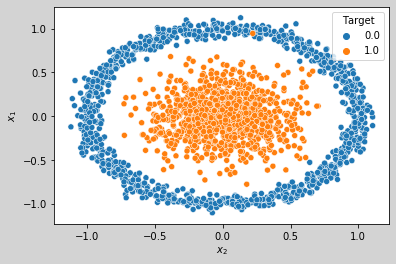

In [6]:
## Do Not Change this Cell
circle_samples = 2000
X_circles, y_circles = make_circles(
  n_samples = circle_samples,
  noise=0.05,
  random_state=42, 
  factor=0.8)
blob_mean = np.array([0,0])
blob_samples = 1000
dim = 2
blob_std = 0.25
X_blob = blob_mean + blob_std * np.random.randn(blob_samples,dim)
X_circle_w_blob = np.vstack([X_circles[y_circles == 0], X_blob])
y_circle_w_blob = np.hstack(
  [np.zeros(len(X_circles[y_circles == 0])), np.ones(blob_samples)])
print('X_circle_w_blob.shape = ', X_circle_w_blob.shape)
print('y_circle_w_blob.shape = ', y_circle_w_blob.shape)
df_circle_w_blob = pd.DataFrame(data=X_circle_w_blob)
df_circle_w_blob['Target'] = y_circle_w_blob
# Visualizing The Data Set
fig, ax = plt.subplots()
sns.scatterplot(data=df_circle_w_blob, x=0, y=1, hue='Target', ax=ax)
fig.patch.set_facecolor('lightgray')
ax.set_xlabel("$x_2$")
ax.set_ylabel("$x_1$")

Task 3: Use linear features only, and ReLU activation and see which architectures work best for classifying the data set in the upper left (ring inside a ring).

What is the smallest number of nodes? Is it better to have more layers or more nodes in a layer (fixing the total number of nodes)? Now try the three non-linear activations. Which is fastest? What is the shape of the boundaries?

In [356]:
tf.keras.backend.clear_session()
model = Sequential()
model.add(Dense(4 ,input_shape=(2,) ,activation='relu'))
model.add(Dense(1 ,input_shape=(4,) ,activation='relu'))
model.compile(optimizer='sgd' ,loss='binary_crossentropy' ,metrics=['accuracy'])
model.summary()

K.set_value(model.optimizer.learning_rate, .01)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100, 
                                                  min_delta = 0.1, verbose = 1)
model.fit(X_circle_w_blob ,y_circle_w_blob ,epochs = 500 ,validation_split=.2
          ,batch_size=10 ,callbacks = [early_stopping])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
160/160 [==============================] - 1s 6ms/step - loss: 0.7885 - accuracy: 0.6260 - val_loss: 0.8753 - val_accuracy: 0.0000e+00
Epoch 2/500
160/160 [==============================] - 1s 5ms/step - loss: 0.4973 - accuracy: 0.6941 - val_loss: 0.6984 - val_accuracy: 0.6400
Epoch 3/500
160/160 [==============================] - 1s 5ms/step - loss: 0.4164 - accuracy: 0.8103 - val_loss: 0.5858 - val_accuracy: 0.7625
Epoch 4/500
160/160 [==============================] - 1s 5ms/step - loss: 0.3341 - accur

Epoch 54/500
160/160 [==============================] - 1s 4ms/step - loss: 0.0177 - accuracy: 0.9934 - val_loss: 0.0687 - val_accuracy: 0.9925
Epoch 55/500
160/160 [==============================] - 1s 4ms/step - loss: 0.0190 - accuracy: 0.9936 - val_loss: 0.0705 - val_accuracy: 0.9925
Epoch 56/500
160/160 [==============================] - 1s 4ms/step - loss: 0.0158 - accuracy: 0.9935 - val_loss: 0.0653 - val_accuracy: 0.9925
Epoch 57/500
160/160 [==============================] - 1s 4ms/step - loss: 0.0163 - accuracy: 0.9934 - val_loss: 0.0702 - val_accuracy: 0.9925
Epoch 58/500
160/160 [==============================] - 1s 4ms/step - loss: 0.0168 - accuracy: 0.9939 - val_loss: 0.0707 - val_accuracy: 0.9875
Epoch 59/500
160/160 [==============================] - 1s 4ms/step - loss: 0.0151 - accuracy: 0.9966 - val_loss: 0.0685 - val_accuracy: 0.9925
Epoch 60/500
160/160 [==============================] - 1s 5ms/step - loss: 0.0128 - accuracy: 0.9954 - val_loss: 0.0607 - val_accuracy:

Epoch 111/500
160/160 [==============================] - 1s 4ms/step - loss: 0.0122 - accuracy: 0.9950 - val_loss: 0.0589 - val_accuracy: 0.9925
Epoch 112/500
160/160 [==============================] - 1s 4ms/step - loss: 0.0084 - accuracy: 0.9980 - val_loss: 0.0551 - val_accuracy: 0.9925
Epoch 113/500
160/160 [==============================] - 1s 5ms/step - loss: 0.0146 - accuracy: 0.9964 - val_loss: 0.0598 - val_accuracy: 0.9925
Epoch 00113: early stopping


In [368]:
tf.keras.backend.clear_session()
model = Sequential()
model.add(Dense(4 ,input_shape=(2,) ,activation='tanh'))
model.add(Dense(1 ,input_shape=(4,) ,activation='tanh'))
model.compile(optimizer='sgd' ,loss='binary_crossentropy' ,metrics=['accuracy'])
model.summary()

K.set_value(model.optimizer.learning_rate, .01)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100, 
                                                  min_delta = 0.1, verbose = 1)
model.fit(X_circle_w_blob ,y_circle_w_blob ,epochs = 500 ,validation_split=.2
          ,batch_size=10 ,callbacks = [early_stopping])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
160/160 [==============================] - 1s 6ms/step - loss: 1.1176 - accuracy: 0.4882 - val_loss: 0.8372 - val_accuracy: 0.1100
Epoch 2/500
160/160 [==============================] - 1s 5ms/step - loss: 0.6475 - accuracy: 0.4934 - val_loss: 0.9831 - val_accuracy: 0.0000e+00
Epoch 3/500
160/160 [==============================] - 1s 4ms/step - loss: 0.6049 - accuracy: 0.6183 - val_loss: 0.8510 - val_accuracy: 0.0000e+00
Epoch 4/500
160/160 [==============================] - 1s 4ms/step - loss: 0.5712 - a

160/160 [==============================] - 1s 4ms/step - loss: 0.0239 - accuracy: 0.9960 - val_loss: 0.0878 - val_accuracy: 0.9900
Epoch 54/500
160/160 [==============================] - 1s 4ms/step - loss: 0.0268 - accuracy: 0.9951 - val_loss: 0.0901 - val_accuracy: 0.9900
Epoch 55/500
160/160 [==============================] - 1s 4ms/step - loss: 0.0225 - accuracy: 0.9970 - val_loss: 0.0881 - val_accuracy: 0.9900
Epoch 56/500
160/160 [==============================] - 1s 4ms/step - loss: 0.0222 - accuracy: 0.9964 - val_loss: 0.0889 - val_accuracy: 0.9900
Epoch 57/500
160/160 [==============================] - 1s 4ms/step - loss: 0.0240 - accuracy: 0.9960 - val_loss: 0.0860 - val_accuracy: 0.9900
Epoch 58/500
160/160 [==============================] - 1s 4ms/step - loss: 0.0236 - accuracy: 0.9958 - val_loss: 0.0848 - val_accuracy: 0.9900
Epoch 59/500
160/160 [==============================] - 1s 4ms/step - loss: 0.0213 - accuracy: 0.9972 - val_loss: 0.0833 - val_accuracy: 0.9900
Epoch

Epoch 110/500
160/160 [==============================] - 1s 4ms/step - loss: 0.0191 - accuracy: 0.9928 - val_loss: 0.0682 - val_accuracy: 0.9925
Epoch 111/500
160/160 [==============================] - 1s 5ms/step - loss: 0.0180 - accuracy: 0.9945 - val_loss: 0.0681 - val_accuracy: 0.9925
Epoch 112/500
160/160 [==============================] - 1s 4ms/step - loss: 0.0163 - accuracy: 0.9963 - val_loss: 0.0671 - val_accuracy: 0.9925
Epoch 113/500
160/160 [==============================] - 1s 5ms/step - loss: 0.0189 - accuracy: 0.9940 - val_loss: 0.0689 - val_accuracy: 0.9925
Epoch 114/500
160/160 [==============================] - 1s 4ms/step - loss: 0.0102 - accuracy: 0.9993 - val_loss: 0.0651 - val_accuracy: 0.9925
Epoch 115/500
160/160 [==============================] - 1s 4ms/step - loss: 0.0146 - accuracy: 0.9983 - val_loss: 0.0676 - val_accuracy: 0.9925
Epoch 116/500
160/160 [==============================] - 1s 4ms/step - loss: 0.0129 - accuracy: 0.9989 - val_loss: 0.0659 - val_ac

In [369]:
tf.keras.backend.clear_session()
model = Sequential()
model.add(Dense(4 ,input_shape=(2,) ,activation='sigmoid'))
model.add(Dense(1 ,input_shape=(4,) ,activation='relu'))
model.compile(optimizer='sgd' ,loss='binary_crossentropy' ,metrics=['accuracy'])
model.summary()

K.set_value(model.optimizer.learning_rate, .01)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100, 
                                                  min_delta = 0.1, verbose = 1)
model.fit(X_circle_w_blob ,y_circle_w_blob ,epochs = 500 ,validation_split=.2
          ,batch_size=10 ,callbacks = [early_stopping])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
160/160 [==============================] - 1s 5ms/step - loss: 0.7089 - accuracy: 0.5932 - val_loss: 0.8719 - val_accuracy: 0.0125
Epoch 2/500
160/160 [==============================] - 1s 4ms/step - loss: 0.6663 - accuracy: 0.5507 - val_loss: 0.8407 - val_accuracy: 0.0100
Epoch 3/500
160/160 [==============================] - 1s 5ms/step - loss: 0.6589 - accuracy: 0.5951 - val_loss: 0.9075 - val_accuracy: 0.0000e+00
Epoch 4/500
160/160 [==============================] - 1s 4ms/step - loss: 0.6648 - accur

160/160 [==============================] - 1s 4ms/step - loss: 0.4153 - accuracy: 0.8364 - val_loss: 0.5944 - val_accuracy: 0.8375
Epoch 53/500
160/160 [==============================] - 1s 4ms/step - loss: 0.4074 - accuracy: 0.8345 - val_loss: 0.4968 - val_accuracy: 0.9150
Epoch 54/500
160/160 [==============================] - 1s 4ms/step - loss: 0.4058 - accuracy: 0.8299 - val_loss: 0.6387 - val_accuracy: 0.7800
Epoch 55/500
160/160 [==============================] - 1s 4ms/step - loss: 0.4085 - accuracy: 0.8523 - val_loss: 0.4990 - val_accuracy: 0.9075
Epoch 56/500
160/160 [==============================] - 1s 4ms/step - loss: 0.4043 - accuracy: 0.8308 - val_loss: 0.4629 - val_accuracy: 0.9175
Epoch 57/500
160/160 [==============================] - 1s 4ms/step - loss: 0.3826 - accuracy: 0.8502 - val_loss: 0.5070 - val_accuracy: 0.8925
Epoch 58/500
160/160 [==============================] - 1s 5ms/step - loss: 0.3751 - accuracy: 0.8475 - val_loss: 0.4624 - val_accuracy: 0.9175
Epoch

Epoch 109/500
160/160 [==============================] - 1s 4ms/step - loss: 0.0212 - accuracy: 0.9952 - val_loss: 0.0815 - val_accuracy: 0.9800
Epoch 110/500
160/160 [==============================] - 1s 4ms/step - loss: 0.0225 - accuracy: 0.9947 - val_loss: 0.0842 - val_accuracy: 0.9800
Epoch 111/500
160/160 [==============================] - 1s 4ms/step - loss: 0.0270 - accuracy: 0.9930 - val_loss: 0.0825 - val_accuracy: 0.9800
Epoch 112/500
160/160 [==============================] - 1s 4ms/step - loss: 0.0240 - accuracy: 0.9951 - val_loss: 0.0868 - val_accuracy: 0.9800
Epoch 113/500
160/160 [==============================] - 1s 4ms/step - loss: 0.0217 - accuracy: 0.9919 - val_loss: 0.0771 - val_accuracy: 0.9875
Epoch 114/500
160/160 [==============================] - 1s 4ms/step - loss: 0.0227 - accuracy: 0.9946 - val_loss: 0.0845 - val_accuracy: 0.9800
Epoch 115/500
160/160 [==============================] - 1s 4ms/step - loss: 0.0294 - accuracy: 0.9902 - val_loss: 0.0823 - val_ac

160/160 [==============================] - 1s 4ms/step - loss: 0.0174 - accuracy: 0.9946 - val_loss: 0.0707 - val_accuracy: 0.9875
Epoch 166/500
160/160 [==============================] - 1s 4ms/step - loss: 0.0164 - accuracy: 0.9933 - val_loss: 0.0691 - val_accuracy: 0.9875
Epoch 167/500
160/160 [==============================] - 1s 4ms/step - loss: 0.0139 - accuracy: 0.9945 - val_loss: 0.0688 - val_accuracy: 0.9875
Epoch 168/500
160/160 [==============================] - 1s 4ms/step - loss: 0.0128 - accuracy: 0.9964 - val_loss: 0.0695 - val_accuracy: 0.9875
Epoch 169/500
160/160 [==============================] - 1s 4ms/step - loss: 0.0181 - accuracy: 0.9905 - val_loss: 0.0702 - val_accuracy: 0.9875
Epoch 170/500
160/160 [==============================] - 1s 4ms/step - loss: 0.0140 - accuracy: 0.9930 - val_loss: 0.0676 - val_accuracy: 0.9875
Epoch 171/500
160/160 [==============================] - 1s 6ms/step - loss: 0.0127 - accuracy: 0.9963 - val_loss: 0.0703 - val_accuracy: 0.9875

Task 3 -- Discussion
In this cell discuss how your results for Task 3 compare to your results using the Neural Network Playground. Point by point compare your answers on the browser and with Keras/Tensorflow code.

In [ ]:
I changed the optimizer to sgd, decreased the validation split to .2, 
and decreased the learning rate to. 01.
The fastest activation function is relu at epoch 113.

Text(0, 0.5, '$x_1$')

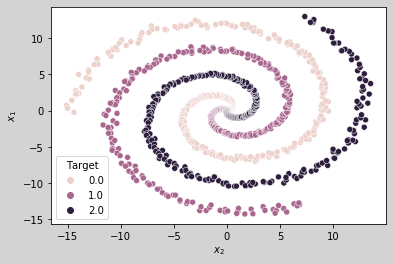

In [7]:
## Do Not Change this Cell
samples = 333
sigma = 0.025
param_length = 3*np.pi
def make_spiral_arms(samples, 
                     sigma=0.25, 
                     param_length=2*np.pi,
                     phase=0.0,
                     spiral_power = 0.6,
                     random_seed=None):
    if random_seed:
        np.random.seed(random_seed)
    X_t = np.linspace(0, param_length, samples)
    X_rad = (X_t.reshape((samples,1)))**(spiral_power)
    X_spiral_arm = (X_rad * (np.vstack([np.cos(X_t + phase) , np.sin(X_t + phase)]).T + 
                np.random.randn(samples,2)*sigma))
    return X_spiral_arm

X_spiral_arm1  = make_spiral_arms(samples, 
                     sigma=sigma, 
                     param_length=param_length,
                     phase=0.0,
                     spiral_power = 1.2)
X_spiral_arm2  = make_spiral_arms(samples, 
                     sigma=sigma, 
                     param_length=param_length,
                     phase=0.0+(2/3)*np.pi,
                     spiral_power = 1.2)
X_spiral_arm3  = make_spiral_arms(samples, 
                     sigma=sigma, 
                     param_length=param_length,
                     phase=0.0+(4/3)*np.pi,
                     spiral_power = 1.2)

X_spiral_arm = np.vstack([X_spiral_arm1,
                           X_spiral_arm2,
                           X_spiral_arm3])
y_spiral_arm = np.vstack([np.zeros((samples,1)), np.ones((samples,1)), 2*np.ones((samples,1))])
df_spiral_arm = pd.DataFrame(data=X_spiral_arm)
df_spiral_arm['Target'] = y_spiral_arm

# Visualizing The Data Set
fig, ax = plt.subplots()
sns.scatterplot(data=df_spiral_arm, x=0, y=1, hue='Target', ax=ax)
fig.patch.set_facecolor('lightgray')
ax.set_xlabel("$x_2$")
ax.set_ylabel("$x_1$")

Task 4: Finally try the spiral data.
Can get a good classification with only linear features? Can you do it with non-linear features and how small a network can work?

In [380]:
tf.keras.backend.clear_session()
model = Sequential()
model.add(Dense(6 ,input_shape=(7,) ,activation='tanh' ,kernel_regularizer=tf.keras.regularizers.l1(0.01)))
model.add(Dense(4 ,input_shape=(6,) ,activation='tanh' ,kernel_regularizer=tf.keras.regularizers.l1(0.003)))
model.add(Dense(4 ,input_shape=(6,) ,activation='tanh' ,kernel_regularizer=tf.keras.regularizers.l1(0.003)))
model.add(Dense(3 ,input_shape=(4,) ,activation='tanh' ,kernel_regularizer=tf.keras.regularizers.l1(0.003)))
model.add(Dense(1 ,input_shape=(3,) ,activation='tanh' ,kernel_regularizer=tf.keras.regularizers.l1(0.003)))
model.compile(optimizer='adam' ,loss='binary_crossentropy' ,metrics=['accuracy'])
model.summary()

K.set_value(model.optimizer.learning_rate, .03)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=200, 
                                                  min_delta = 0.1, verbose = 1)

X1sq = X_spiral_arm[:,0]*X_spiral_arm[:,0]
X2sq = X_spiral_arm[:,1]*X_spiral_arm[:,1]
X1X2 = X_spiral_arm[:,0]*X_spiral_arm[:,1]
sinx1 = np.sin(X_spiral_arm[:,0])
sinx2 = np.sin(X_spiral_arm[:,1])                               
X_spiral_features = np.column_stack((X_spiral_arm[:,0],X_spiral_arm[:,1],X1sq,X2sq,X1X2,sinx1,sinx2))

model.fit(X_spiral_features ,y_spiral_arm ,epochs = 400 ,validation_split=.2
          ,batch_size=10 ,callbacks = [early_stopping])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 48        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 15        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 4         
Total params: 115
Trainable params: 115
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
80/80 [==============================] - 1s 9ms/step - loss: 1.6881 - accuracy: 0.4461 - val_loss: 0.3953 - val_

Epoch 50/500
80/80 [==============================] - 0s 6ms/step - loss: -1.4433 - accuracy: 0.4783 - val_loss: 0.6896 - val_accuracy: 0.0000e+00
Epoch 51/500
80/80 [==============================] - 0s 6ms/step - loss: -1.5773 - accuracy: 0.5419 - val_loss: 0.8118 - val_accuracy: 0.0000e+00
Epoch 52/500
80/80 [==============================] - 0s 6ms/step - loss: -1.4927 - accuracy: 0.5420 - val_loss: 0.6253 - val_accuracy: 0.0000e+00
Epoch 53/500
80/80 [==============================] - 0s 6ms/step - loss: -1.7083 - accuracy: 0.5248 - val_loss: 0.9563 - val_accuracy: 0.0000e+00
Epoch 54/500
80/80 [==============================] - 0s 6ms/step - loss: -1.5761 - accuracy: 0.4980 - val_loss: 0.9181 - val_accuracy: 0.0000e+00
Epoch 55/500
80/80 [==============================] - 0s 6ms/step - loss: -1.8182 - accuracy: 0.5146 - val_loss: 0.5456 - val_accuracy: 0.0000e+00
Epoch 56/500
80/80 [==============================] - 0s 6ms/step - loss: -1.5696 - accuracy: 0.5157 - val_loss: -0.05

80/80 [==============================] - 0s 5ms/step - loss: 2.3132 - accuracy: 0.5183 - val_loss: 6.2502 - val_accuracy: 0.0000e+00
Epoch 106/500
80/80 [==============================] - 0s 5ms/step - loss: 2.9311 - accuracy: 0.5398 - val_loss: 6.2444 - val_accuracy: 0.0000e+00
Epoch 107/500
80/80 [==============================] - 1s 6ms/step - loss: 1.8996 - accuracy: 0.5113 - val_loss: 6.2333 - val_accuracy: 0.0000e+00
Epoch 108/500
80/80 [==============================] - 0s 6ms/step - loss: 2.1289 - accuracy: 0.5561 - val_loss: 6.3066 - val_accuracy: 0.0000e+00
Epoch 109/500
80/80 [==============================] - 0s 6ms/step - loss: 1.8936 - accuracy: 0.5475 - val_loss: 6.2373 - val_accuracy: 0.0000e+00
Epoch 110/500
80/80 [==============================] - 0s 6ms/step - loss: 2.4878 - accuracy: 0.5309 - val_loss: 5.7454 - val_accuracy: 0.0000e+00
Epoch 111/500
80/80 [==============================] - 0s 6ms/step - loss: 2.3629 - accuracy: 0.5251 - val_loss: 14.5096 - val_accur

80/80 [==============================] - 0s 6ms/step - loss: -1.1320 - accuracy: 0.5437 - val_loss: 2.2194 - val_accuracy: 0.0000e+00
Epoch 161/500
80/80 [==============================] - 0s 6ms/step - loss: -1.4702 - accuracy: 0.5101 - val_loss: 2.6822 - val_accuracy: 0.0000e+00
Epoch 162/500
80/80 [==============================] - 0s 6ms/step - loss: -1.2794 - accuracy: 0.5027 - val_loss: 1.3582 - val_accuracy: 0.0000e+00
Epoch 163/500
80/80 [==============================] - 0s 5ms/step - loss: -1.4745 - accuracy: 0.5688 - val_loss: 1.4997 - val_accuracy: 0.0000e+00
Epoch 164/500
80/80 [==============================] - 0s 5ms/step - loss: -1.4988 - accuracy: 0.5105 - val_loss: -0.1560 - val_accuracy: 0.0000e+00
Epoch 165/500
80/80 [==============================] - 0s 6ms/step - loss: -1.5800 - accuracy: 0.5181 - val_loss: 1.0255 - val_accuracy: 0.0000e+00
Epoch 166/500
80/80 [==============================] - 0s 6ms/step - loss: -1.2058 - accuracy: 0.5622 - val_loss: -4.2507 - v

80/80 [==============================] - 0s 6ms/step - loss: -1.8155 - accuracy: 0.6196 - val_loss: 1.1947 - val_accuracy: 0.0000e+00
Epoch 216/500
80/80 [==============================] - 0s 5ms/step - loss: -1.8170 - accuracy: 0.5993 - val_loss: 1.7776 - val_accuracy: 0.0000e+00
Epoch 217/500
80/80 [==============================] - 0s 6ms/step - loss: -1.8933 - accuracy: 0.6214 - val_loss: 1.1785 - val_accuracy: 0.0000e+00
Epoch 218/500
80/80 [==============================] - 0s 6ms/step - loss: -1.8473 - accuracy: 0.6244 - val_loss: 2.2499 - val_accuracy: 0.0000e+00
Epoch 219/500
80/80 [==============================] - 0s 6ms/step - loss: -1.9291 - accuracy: 0.6598 - val_loss: 0.8523 - val_accuracy: 0.0000e+00
Epoch 220/500
80/80 [==============================] - 0s 6ms/step - loss: -1.5434 - accuracy: 0.6387 - val_loss: 0.6200 - val_accuracy: 0.0000e+00
Epoch 221/500
80/80 [==============================] - 1s 6ms/step - loss: -1.8564 - accuracy: 0.6420 - val_loss: 1.7941 - val

80/80 [==============================] - 1s 7ms/step - loss: -1.4472 - accuracy: 0.5536 - val_loss: -0.1456 - val_accuracy: 0.0000e+00
Epoch 271/500
80/80 [==============================] - 1s 7ms/step - loss: -1.7084 - accuracy: 0.5320 - val_loss: 0.2300 - val_accuracy: 0.0000e+00
Epoch 272/500
80/80 [==============================] - 1s 7ms/step - loss: -1.7057 - accuracy: 0.4901 - val_loss: 0.0449 - val_accuracy: 0.0000e+00
Epoch 273/500
80/80 [==============================] - 0s 6ms/step - loss: -1.8610 - accuracy: 0.4915 - val_loss: 0.9512 - val_accuracy: 0.0000e+00
Epoch 274/500
80/80 [==============================] - 0s 6ms/step - loss: -1.8625 - accuracy: 0.5372 - val_loss: -0.3427 - val_accuracy: 0.0000e+00
Epoch 275/500
80/80 [==============================] - 0s 6ms/step - loss: -1.9911 - accuracy: 0.5127 - val_loss: -0.4250 - val_accuracy: 0.0000e+00
Epoch 276/500
80/80 [==============================] - 0s 6ms/step - loss: -1.7591 - accuracy: 0.5296 - val_loss: 0.0579 - 

Task 4 -- Discussion
In this cell discuss how your results for Task 4 compare to your results using the Neural Network Playground. Point by point compare your answers on the browser and with Keras/Tensorflow code.

In [ ]:
Keeping the same parameters, I am unable to reproduce the test loss of .005 I had initially found.
The initial experiment, I was able that after ~200 epochs.